In [2]:
from geogif import gif
import xarray as xr
import numpy as np

path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/remap/era5_1deg_1D_spatial_norm2_sst.nc'

In [3]:
mapping = xr.open_dataset(path)

In [4]:
mapping

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 16496, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 132kB 1979-01-01T11:00:00 ... 2024-02-29...
  * longitude  (longitude) float32 1kB -180.0 -179.0 -178.0 ... 178.0 179.0
  * latitude   (latitude) float32 720B 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0
Data variables:
    sst        (time, latitude, longitude) float32 4GB ...

In [1]:


def make_gif(name, dataset, start_date = '2015-01-01', end_date = '2018-12-31'):
    """ Store a GIF """
    image =   gif(dataset.sel(time=slice(start_date, end_date)), to=f"{name}.gif")
    return image


path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/visualisations/era5_1deg_1D_REindexed_1940-2024_sst.nc'
mapping = xr.open_dataset(path)



# Step 1: Calculate the weekly mean per gridpoint
weekly_mean = mapping.groupby('time.week').mean(dim='time')

# Step 2: Subtract the weekly mean from the original data
data_deseasonalized = mapping.groupby('time.isocalendar().week') - weekly_mean

make_gif('sst_deasonal?', data_deseasonalized['sst'])


/home/adboer/.conda/envs/dlwp-hpx/lib/python3.12/site-packages/xarray/core/dataset.py:227: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  data = getattr(ref_var.dt, var_name).data


: 

In [11]:
weights_map = xr.open_dataset(path)

mean = weights_map.cell_area.mean()

scaled_weights_map = weights_map.cell_area / mean

print(scaled_weights_map.values) #(180, 360)

print('min', np.min(scaled_weights_map.values))
print('max', np.max(scaled_weights_map.values))

[[0.00342675 0.00342675 0.00342675 ... 0.00342675 0.00342675 0.00342675]
 [0.02741244 0.02741244 0.02741244 ... 0.02741244 0.02741244 0.02741244]
 [0.05481653 0.05481653 0.05481653 ... 0.05481653 0.05481653 0.05481653]
 ...
 [0.08220393 0.08220393 0.08220393 ... 0.08220393 0.08220393 0.08220393]
 [0.05481653 0.05481653 0.05481653 ... 0.05481653 0.05481653 0.05481653]
 [0.03083919 0.03083919 0.03083919 ... 0.03083919 0.03083919 0.03083919]]
min 0.003426750253700832
max 1.5708162617062302


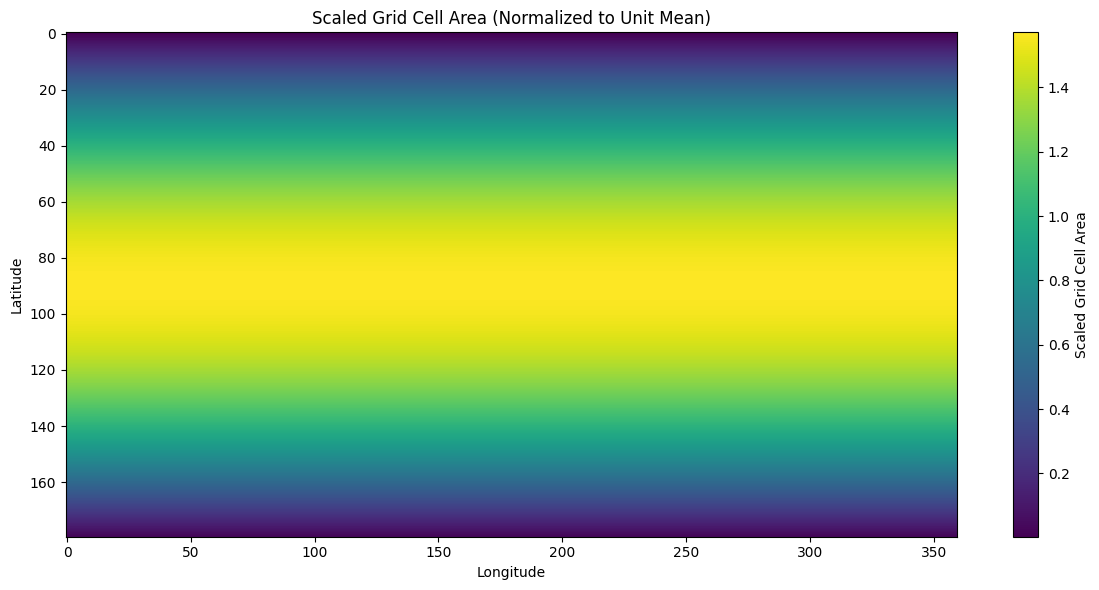

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've already calculated scaled_weights_map as shown in your code

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a heatmap of the scaled weights
im = ax.imshow(scaled_weights_map.values, cmap='viridis', aspect='auto')

# Add a colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Scaled Grid Cell Area')

# Set title and labels
ax.set_title('Scaled Grid Cell Area (Normalized to Unit Mean)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Assuming 'scaled_temperature' is your xarray DataArray with shape (face: 12, height: 32, width: 32)
# Create a figure with subplots
num_faces = 12

fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration
# Loop through each face and plot
for face_index in range(num_faces):
    # Extract data for the current face
    data_to_plot = sst_map['cell_area'][face_index, :, :].values  # Shape (height, width)

    # Plotting
    im = axes[face_index].imshow(data_to_plot, cmap='viridis', origin='lower')
    axes[face_index].set_title(f'Face {face_index + 1}')
    axes[face_index].set_xlabel('Width Index')
    axes[face_index].set_ylabel('Height Index')
    axes[face_index].axis('off')  # Turn off axis for better visibility

# Add a colorbar to the last subplot
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
cbar.set_label('Scaled Temperature')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## SST

In [17]:
import xarray as xr
import numpy as np
file_path_ll = '/home/adboer/dlwp-hpx/era5_1deg_1D_HPX64_1940-2024_sst.nc'
sst_map = xr.open_dataset(file_path_ll)

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Assuming 'scaled_temperature' is your xarray DataArray with shape (face: 12, height: 32, width: 32)
# Create a figure with subplots
num_faces = 12

fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration
# Loop through each face and plot
for face_index in range(num_faces):
    # Extract data for the current face
    data_to_plot = sst_map['sst'][0][face_index, :, :].values  # Shape (height, width)

    # Plotting
    im = axes[face_index].imshow(data_to_plot, cmap='viridis', origin='lower')
    axes[face_index].set_title(f'Face {face_index + 1}')
    axes[face_index].set_xlabel('Width Index')
    axes[face_index].set_ylabel('Height Index')
    axes[face_index].axis('off')  # Turn off axis for better visibility

# Add a colorbar to the last subplot
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
cbar.set_label('Scaled Temperature')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Grid adea

In [ ]:
import xarray as xr
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/data/era5_1deg_1D_HPX64_1940-2024_grid_area.nc'
land_sea_mask = xr.open_dataset(path) # m**2 

#MSLP

In [ ]:
import xarray as xr
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/visualisations/era5_1degr_rounded_lsmask.nc'
land_sea_mask = xr.open_dataset(path) # m**2
land_sea_mask # 0 to 259 (90 to -89)

In [ ]:
# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(land_sea_mask.lsm.values[0], cmap='coolwarm', aspect='auto', extent=[0, 360, -39, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Sea Surface Temperature on')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:


# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(sst_first, cmap='coolwarm', aspect='auto', extent=[0, 360, -39, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Sea Surface Temperature on')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Land sea mask

In [ ]:

import xarray as xr
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

file_path_ll = '/gpfs/work5/0/prjs1254/data_ERA5_1.0/ERA5_land_sea_mask_1deg.nc'
land_sea_mask = xr.open_dataset(file_path_ll) # m**2
land_sea_mask # 0 to 259 (90 to -89)


# Select the first time stamp
sst_first = land_sea_mask.lsm.isel(time=0)

# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(sst_first, cmap='coolwarm', aspect='auto', extent=[0, 360, -39, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Sea Surface Temperature on')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import xarray as xr
import numpy as np
file_path_ll = '/gpfs/work5/0/prjs1254/data_ERA5_1.0/OLR_era5_tropics_1degr_19400101_20240229.nc'
sst_map = xr.open_dataset(file_path_ll)

ds_remapped = sst_map.assign_coords(longitude=(((sst_map.longitude + 360) % 360)))

# Assuming 'ds' is your original dataset
new_lats = np.arange(90, -90, -1, dtype=np.float32)
ds_expanded = ds_remapped.reindex(latitude=new_lats, fill_value=0)
ds_remapped = ds_expanded.sortby('longitude')
ds_remapped.to_netcdf('OLR_era5_tropics_1degr_19400101_20240229.nc')


In [ ]:
import xarray as xr

new_path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/visualisations/era5_1deg_1D_reindexed_1940-2024_sst.nc'
# dataset_2tm = xr.open_dataset(new_path) # m**2
# dataset_2tm
file_path_ll = '/gpfs/work5/0/prjs1254/data_ERA5_1.0/GridArea_era5_Global_1degr.nc'
dataset_2tm = xr.open_dataset(file_path_ll) # m**2
dataset_2tm

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

dataset_2tm = dataset_2tm.sortby('longitude')
# Select the first time stamp
sst_first = dataset_2tm.cell_area #.isel(time=0)

# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(sst_first, cmap='coolwarm', aspect='auto', extent=[0, 360, -89, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Grid weighting')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [4]:
dataset_2tm.to_netcdf('era5_1deg_1D_1940-2024_gridarea.nc')

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Select the first time stamp
sst_first = dataset_2tm.cell_area #.isel(time=0)

# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(sst_first, cmap='coolwarm', aspect='auto', extent=[0, 360, -89, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Grid weighting')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
file_path_ll = '/gpfs/work5/0/prjs1254/data_ERA5_1.0/T2M_era5_Global_1degr_19400101-20240229.nc'
dataset_2tm = xr.open_dataset(file_path_ll) # m**2
dataset_2tm


In [ ]:
# Select the first time stamp
sst_first = dataset_2tm.t2m.isel(time=0)

# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(sst_first, cmap='coolwarm', aspect='auto', extent=[0, 360, -89, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Sea Surface Temperature on {sst_first.time.values}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [3]:
import xarray as xr
path = '/home/adboer/dlwp-hpx/era5_1deg_1D_HPX64_1940-2024_grid_area.nc'
data = xr.open_dataset(path)

In [10]:
file_path_ll = '/gpfs/work5/0/prjs1254/data_ERA5_1.0/STREAM500_era5_Global_1degr_19400101_20240229.nc'
sst_map = xr.open_dataset(file_path_ll)
sst_map # -180 to 179 (this does not align)
# rename variable to 'stream250'
# Rename the variable to 'stream250'
sst_map = sst_map.rename({'stream': 'stream500'})

sst_map.to_netcdf('era5_1deg_1D_1940-2024_stream500.nc')

In [11]:
file_path_ll = '/gpfs/work5/0/prjs1254/data_ERA5_1.0/STREAM250_era5_Global_1degr_19400101_20240229.nc'
sst_map = xr.open_dataset(file_path_ll)
sst_map # -180 to 179 (this does not align)
# rename variable to 'stream250'
# Rename the variable to 'stream250'
sst_map = sst_map.rename({'stream': 'stream250'})

sst_map.to_netcdf('era5_1deg_1D_1940-2024_stream250.nc')

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Select the first time stamp
sst_first = ds_remapped.ttr.isel(time=0)

# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(sst_first, cmap='coolwarm', aspect='auto', extent=[0, 360, -39, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Sea Surface Temperature on')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [15]:
import xarray as xr
import numpy as np

# Assuming 'ds' is your original dataset
new_lats = np.arange(90, -90, -1, dtype=np.float32)
ds_expanded = ds_remapped.reindex(latitude=new_lats, fill_value=0)


In [16]:
# Save the modified dataset to a local NetCDF file
ds_expanded.to_netcdf('era5_1deg_1D_reindexed_1940-2024_sst.nc')


In [ ]:
ds_remapped = ds_expanded.sortby('longitude')
ds_remapped

import xarray as xr
import matplotlib.pyplot as plt


# Select the first time stamp
sst_first = ds_remapped.sst.isel(time=0)

# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(sst_first, cmap='coolwarm', aspect='auto', extent=[0, 360, -39, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Sea Surface Temperature on {sst_first.time.values}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:

ds_remapped = ds_remapped.sortby('longitude')
ds_remapped

import xarray as xr
import matplotlib.pyplot as plt


# Select the first time stamp
sst_first = ds_remapped.sst.isel(time=0)

# Create a plot
plt.figure(figsize=(12, 6))
plt.imshow(sst_first, cmap='coolwarm', aspect='auto', extent=[0, 360, -39, 90])
plt.colorbar(label='Sea Surface Temperature (K)')
plt.title(f'Sea Surface Temperature on {sst_first.time.values}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [ ]:
import xarray as xr
from plot_zonal_spectrum import *
data_path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/data/era5_hpx64_1var_24h_24h.zarr'
# data_path = '/gpfs/work5/0/prjs1254/data_ERA5_1.0/SST_era5_NHExt_1degr_19400101-20240229.nc'
data_path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/forecasts/forecast_hpx64_data_unet_initial.nc'
data_path = '/home/adboer/dlwp-hpx/src/dlwp-hpx/forecasts/forecast_hpx64_data_unet_initial.nc'
dataset_2tm = xr.open_dataset(data_path)
dataset_2tm

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Assuming 'scaled_temperature' is your xarray DataArray with shape (face: 12, height: 32, width: 32)
# Create a figure with subplots
num_faces = 12

for step in range(7):
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Adjust the size as needed
    axes = axes.flatten()  # Flatten the array of axes for easy iteration
    # Loop through each face and plot
    for face_index in range(num_faces):
        # Extract data for the current face
        data_to_plot = dataset_2tm['t2m'][0][step][face_index, :, :].values  # Shape (height, width)

        # Plotting
        im = axes[face_index].imshow(data_to_plot, cmap='viridis', origin='lower')
        axes[face_index].set_title(f'Face {face_index + 1}')
        axes[face_index].set_xlabel('Width Index')
        axes[face_index].set_ylabel('Height Index')
        axes[face_index].axis('off')  # Turn off axis for better visibility

    # Add a colorbar to the last subplot
    cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
    cbar.set_label('Scaled Temperature')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [ ]:
import xarray as xr
data_path = 'dlwp-hpx/src/dlwp-hpx/data/era5_1deg_1D_HPX64_1940-2024_sst.nc'
# data_path = '/gpfs/work5/0/prjs1254/data_ERA5_1.0/SST_era5_NHExt_1degr_19400101-20240229.nc'
dataset_2tm = xr.open_dataset(data_path)
dataset_2tm 

In [ ]:
var = 't2m'
inputs = dataset_2tm.inputs
weeks = inputs['time'].dt.isocalendar().week.values
unique_weeks = np.unique( weeks)
channel_index = inputs.channel_in.values.tolist().index(var)
print("DATASET - spatial fine scaling")
mean_std_dict = {}

mean_std_dict['t2m'] = {}
for j, week in enumerate(unique_weeks):
    mean = inputs[:, channel_index, :, :, :].groupby('time.week').mean().sel(week=week).values
    std = inputs[:, channel_index, :, :, :].groupby('time.week').std().sel(week=week).values
    print(week)
    #print(std)
    mean_std_dict[var][week] = {'mean': mean, 'std': std}
# print(f"Collected means per week for variable {var}")

In [ ]:
mean_std_dict['t2m'][1]['mean'].shape # mean for the variable for the first week

In [ ]:
mean_std_dict['t2m'][1]['std'].shape # standard deviation for the variable for the first week

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape to prepare for boxplot: Flatten grid points into a single list per week
for week in range(len(mean_std_dict['t2m'])):
    week = week + 1
    boxplot_data = []
    for face in range(12):  # Assuming weeks are represented by the first dimension
        face_data = mean_std_dict['t2m'][week]['mean'][face].flatten()  # Flatten to 1D array
        boxplot_data.append(face_data)

    # Create a boxplot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_data)
    plt.title(f'Boxplot of Mean Temperature at week {week} for Each Face')
    plt.xlabel(f'Week {week}')
    plt.ylabel('Mean Temperature (°C)')
    plt.xticks(ticks=np.arange(12), labels=[f'Face {i+1}' for i in range(12)])
    plt.grid(True)
    plt.show()


In [ ]:
# I want to plot the healpix data

import numpy as np
import xarray as xr

# Assuming 'inputs' is your xarray Dataset and 'unique_weeks' is defined
var = 't2m'
channel_index = inputs.channel_in.values.tolist().index(var)

vars = ['t2m']
new_datasets = []
# Assuming input_array is defined and structured appropriately
# Apply fine scaling for input variables
for i, var in enumerate(dataset_2tm.channel_in.values):
    if var in vars:
        weeks = dataset_2tm['time'].dt.isocalendar().week.values
        unique_weeks = np.unique( weeks)
        
        for j, week in enumerate(unique_weeks):
            # Retrieve mean and std for scaling
            mean = mean_std_dict[var][week]['mean']
            std = mean_std_dict[var][week]['std']
            print(f"mean for week {week}")
            print(mean.shape) # (12, 32, 32)
            # scale the entire week of this data set by this week

            # scale the slice of the dataset by this mean
            week_mask = dataset_2tm['time'].dt.isocalendar().week == week
            original = dataset_2tm.where(week_mask, drop=True).inputs[:, 0, :, :, :]
           
            weeklydata = dataset_2tm.where(week_mask, drop=True).inputs[:, 0, :, :, :]
            new_val = (weeklydata - mean) / std
            
            # how to reset the values in the dataset_2tm, store the new values???
            dataset_2tm.where(week_mask, drop=True).inputs[:, 0, :, :, :]  = new_val
            print(new_val)

            # Create a new xarray Dataset using new_val
            new_ds = xr.Dataset(
                {
                    'scaled_temperature': (['time','face', 'height', 'width' ], new_val.values)
                },
                coords={
                    'time': dataset_2tm['time'].where(week_mask, drop=True),
                    'lat': dataset_2tm['lat'],
                    'lon': dataset_2tm['lon']
                }
                
            )
            
            # Append the new dataset to the list
            new_datasets.append(new_ds)
           
    else:
        break  # Exit if variable is not found in fine_scaled_vars


In [ ]:
# Concatenate all new datasets along the 'time' dimension
merged_dataset = xr.concat(new_datasets, dim='time')

# Inspect the merged dataset
print(merged_dataset)

In [ ]:
merged_dataset['scaled_temperature'][0]

In [ ]:
dataset_2tm

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Assuming 'scaled_temperature' is your xarray DataArray with shape (face: 12, height: 32, width: 32)
# Create a figure with subplots
num_faces = 12
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through each face and plot
for face_index in range(num_faces):
    # Extract data for the current face
    data_to_plot = dataset_2tm.inputs[:, 0, :, :, :][304][face_index, :, :].values  # Shape (height, width)

    # Plotting
    im = axes[face_index].imshow(data_to_plot, cmap='viridis', origin='lower')
    axes[face_index].set_title(f'Face {face_index + 1}')
    axes[face_index].set_xlabel('Width Index')
    axes[face_index].set_ylabel('Height Index')
    axes[face_index].axis('off')  # Turn off axis for better visibility

# Add a colorbar to the last subplot
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
cbar.set_label('Scaled Temperature')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Assuming 'scaled_temperature' is your xarray DataArray with shape (face: 12, height: 32, width: 32)
# Create a figure with subplots
num_faces = 12
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through each face and plot
for face_index in range(num_faces):
    # Extract data for the current face
    data_to_plot = merged_dataset['scaled_temperature'][304][face_index, :, :].values  # Shape (height, width)

    # Plotting
    im = axes[face_index].imshow(data_to_plot, cmap='viridis', origin='lower')
    axes[face_index].set_title(f'Face {face_index + 1}')
    axes[face_index].set_xlabel('Width Index')
    axes[face_index].set_ylabel('Height Index')
    axes[face_index].axis('off')  # Turn off axis for better visibility

# Add a colorbar to the last subplot
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)
cbar.set_label('Scaled Temperature')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:

from ..remap.healpix import *

# '/gpfs/home6/adboer/dlwp-hpx/src/dlwp-hpx/visualisations'
# move to : /gpfs/home6/adboer/dlwp-hpx/src/dlwp-hpx/remap/healpix.py
remapper = HEALPixRemap(
        latitudes=180,
        longitudes=360,
        nside=64
    )

In [ ]:
pwd

In [ ]:
# Reshape to prepare for boxplot: Flatten grid points into a single list per week
for week in range(2):
    week = week + 1
    boxplot_data = []
    for face in range(12):  # Assuming weeks are represented by the first dimension
        face_data = merged_dataset['scaled_temperature'][face].flatten()  # Flatten to 1D array
        boxplot_data.append(face_data)

    # Create a boxplot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_data)
    plt.title(f'Boxplot of Mean Temperature at week {week} for Each Face')
    plt.xlabel(f'Week {week}')
    plt.ylabel('Mean Temperature (°C)')
    plt.xticks(ticks=np.arange(12), labels=[f'Face {i+1}' for i in range(12)])
    plt.grid(True)
    plt.show()

In [ ]:
# Assuming merged_dataset is your final concatenated dataset
output_file_path = 'scaled_t2m_data.nc'  # Define the output file name

# Save the merged dataset to a NetCDF file
merged_dataset.to_netcdf(path=output_file_path, mode='w', format='NETCDF4')

print(f"Merged dataset saved to {output_file_path}")


In [13]:
output_file_path = 'scaled_t2m_data.nc'
dataset_2tm = xr.open_dataset(output_file_path)

In [ ]:
dataset_2tm['scaled_temperature']

In [ ]:
# printing the scaled vallues
# Reshape to prepare for boxplot: Flatten grid points into a single list per week
for week in range(len(mean_std_dict['t2m'])):
    week = week + 1
    boxplot_data = []
    for face in range(12):  # Assuming weeks are represented by the first dimension
        face_data = dataset_2tm['t2m'].inputs[:, 0, :, :, :]  #mean_std_dict['t2m'][week]['mean'][face].flatten()  # Flatten to 1D array
        boxplot_data.append(face_data)

    # Create a boxplot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_data)
    plt.title(f'Boxplot of Mean Temperature at week {week} for Each Face')
    plt.xlabel(f'Week {week}')
    plt.ylabel('Mean Temperature (°C)')
    plt.xticks(ticks=np.arange(12), labels=[f'Face {i+1}' for i in range(12)])
    plt.grid(True)
    plt.show()

In [ ]:


# Reshape to prepare for boxplot: Flatten grid points into a single list per week
for week in range(len(mean_std_dict['t2m'])):
    week = week + 1
    boxplot_data = []
    for face in range(12):  
        face_data = merged_dataset['scaled_temperature'].inputs[:, 0, :, :, :] 
        boxplot_data.append(face_data)

    # Create a boxplot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_data)
    plt.title(f'Boxplot of Mean Temperature at week {week} for Each Face')
    plt.xlabel(f'Week {week}')
    plt.ylabel('Mean Temperature (°C)')
    plt.xticks(ticks=np.arange(12), labels=[f'Face {i+1}' for i in range(12)])
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np
import xarray as xr
import healpy as hp
import matplotlib.pyplot as plt

# Assuming 'inputs' is your xarray Dataset and 'mean_std_dict' is defined
var = 't2m'
channel_index = inputs.channel_in.values.tolist().index(var)

vars = ['t2m']

# Assuming unique_weeks are defined
weeks = dataset_2tm['time'].dt.isocalendar().week.values
unique_weeks = np.unique(weeks)

# Apply fine scaling for input variables
for i, var in enumerate(dataset_2tm.channel_in.values):
    if var in vars:
        for j, week in enumerate(unique_weeks[:3]):  # Loop through the first 3 unique weeks
            # Create a mask for the selected week
            week_mask = dataset_2tm['time'].dt.isocalendar().week == week
            
            # Filter the dataset for the selected week
            weekly_data = dataset_2tm.where(week_mask, drop=True)
            
            # Calculate mean and standard deviation for the selected week
            mean = weekly_data.mean(dim='time')  # Average over time dimension
            std = weekly_data.std(dim='time')     # Standard deviation over time dimension
            
            # print(f"Mean for week {week}: {mean}")
            # print(f"Std for week {week}: {std}")

            # Scale the entire dataset using broadcasting
            scaled_data = (weekly_data.inputs[:, channel_index, :, :, :] - mean) / std
            print("dataset!!")
            print(scaled_data)
            # Prepare data for Healpix plotting (assuming you want to plot scaled data for that week)
            #healpix_data = scaled_data.where(week_mask, drop=True).values #.flatten()  # Flattening for Healpix
            
            # Create a Healpix map (assuming nside is known; adjust as necessary)
            #nside = 32  # Example NSIDE value; adjust based on your resolution needs
            #healpix_map = hp.ud_grade(healpix_data, nside_out=nside)  # Adjust resolution
            
            # Plotting the Healpix map
            #hp.mollview(healpix_map, title=f'Week {week} - Scaled {var}', unit='Scaled Temperature', cmap='jet')
            #hp.graticule()
            #plt.show()  # Display the plot

    else:
        break  # Exit if variable is not found in fine_scaled_vars


In [ ]:
for week in range(len(mean_std_dict['t2m'])):
    week = week + 1
    boxplot_data = []
    for face in range(12):  # Assuming weeks are represented by the first dimension
        face_data = mean_std_dict['t2m'][week]['mean'][face].flatten()  # Flatten to 1D array
        boxplot_data.append(face_data)

    # Create a boxplot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=boxplot_data)
    plt.title(f'Boxplot of Mean Temperature at week {week} for Each Face')
    plt.xlabel(f'Week {week}')
    plt.ylabel('Mean Temperature (°C)')
    plt.xticks(ticks=np.arange(12), labels=[f'Face {i+1}' for i in range(12)])
    plt.grid(True)
    plt.show()

In [ ]:
def make_gif(name, dataset, start_date = '2015-01-01', end_date = '2018-12-31'):
    """ Store a GIF """
    image =   gif(dataset.sel(time=slice(start_date, end_date)), to=f"{name}.gif")
    return image